In [ ]:
!pip install super-gradients

In [ ]:
!pip install imutils

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
!pip install pytube --upgrade

In [ ]:
import torch

torch.__version__

'2.2.1+cu121'

In [ ]:
#using cpu if gpu is  not present

torch.cuda.is_available = lambda : False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
from super_gradients.training import models

'Tesla T4'

In [ ]:
yolo_nas_s=models.get("yolo_nas_s",pretrained_weights="coco")

[2024-05-10 05:45:01] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-05-10 05:45:01] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██████████| 73.1M/73.1M [00:01<00:00, 38.9MB/s]
[2024-05-10 05:45:03] INFO - checkpo

In [ ]:
!pip install torchinfo

In [ ]:


from torchinfo import summary

summary(model=yolo_nas_s,
         input_size=(16, 3, 640, 640),
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"]
 )

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_S (YoloNAS_S)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

[2024-05-10 05:47:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


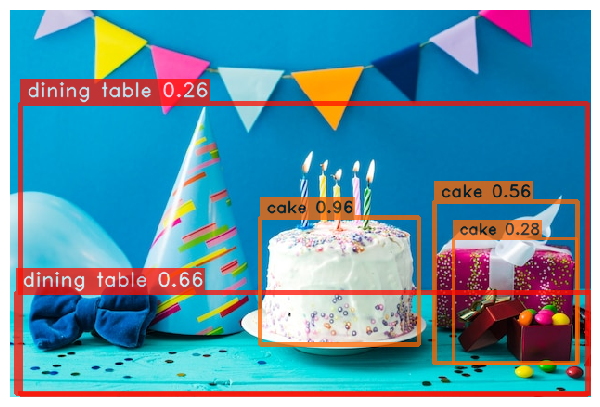

In [ ]:
url = "https://img.freepik.com/free-photo/present-homemade-cake_23-2147666267.jpg"
yolo_nas_s.predict(url, conf=0.25).show()

In [ ]:
#To fine tune the model according to the dataset we need to create a trainer
from super_gradients.training import Trainer

In [ ]:
#A checkpoint folder is created to store the results and all
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='my_first_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

In [ ]:
#super gradients support all kinds of format of data and it can be used my making use of dataloader

from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train,coco_detection_yolo_format_val


In [ ]:
dataset_params = {
    'data_dir':'FallDetection',#folder name
    'train_images_dir':'train/images',#inside the folder we have train inside that images
    'train_labels_dir':'train/labels',
    'val_images_dir':'val/images',
    'val_labels_dir':'val/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['Fall-Detected'] #we need to provide our own custom classes
}

In [ ]:
#using the dataset params for our format and loading it using the data loader which was imported
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

RuntimeError: data_dir=FallDetection not found. Please make sure that data_dir points toward your dataset.

In [ ]:
# To perform data augmentation
train_data.dataset.transforms

In [ ]:
train_data.dataset.dataset_params['transforms'][1]

In [ ]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

In [ ]:
train_data.dataset.plot()

In [ ]:
#starting the model training (instantiation)
from super_gradients.training import models
model = models.get('yolo_nas_s',
                   num_classes=6,
                   pretrained_weights="/content/ckpt_best.pth"
                   )

ValueError: `pretrained_weights="/content/ckpt_best.pth"` is not a valid and was not found in that platform. Valid pretrained weights are: "dict_keys(['imagenet', 'imagenet21k', 'coco_segmentation_subclass', 'cityscapes', 'coco', 'coco_pose', 'cifar10'])"

In [ ]:
# so this is for selecting the loss and custom optimizer basically for hyper parameter tuning
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 100,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

NameError: name 'dataset_params' is not defined

In [ ]:
#staring the model training
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

In [ ]:
#so once outr model gets trained then we need to give the path of best.pt which will be created in the checkpoint folder
best_model = models.get('yolo_nas_s',
                        num_classes=6,
                        checkpoint_path="/content/ckpt_best.pth")
                        #checkpoint_path="checkpoints/my_first_yolonas_run/average_model.pth")

[2024-05-14 11:07:54] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/ckpt_best.pth EMA checkpoint.


In [ ]:
#for evaluation
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

[2024-05-14 11:15:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


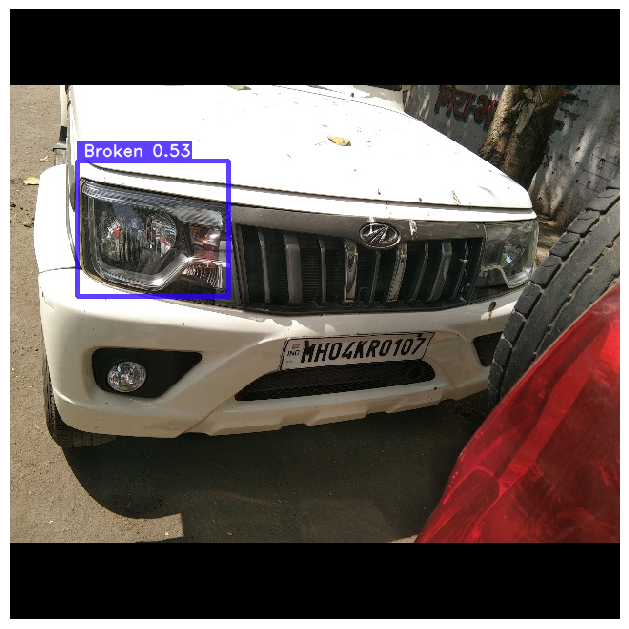

In [ ]:
#for prediction
test_image = '/content/Q-Jz1slX2Hu Original Image 1.jpg'
best_model.predict(test_image).show()

In [ ]:
test_image = '/content/Q-Jz1slX2Hu Original Image 1.jpg'
best_model.predict(test_image).show()

[2024-05-14 10:56:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


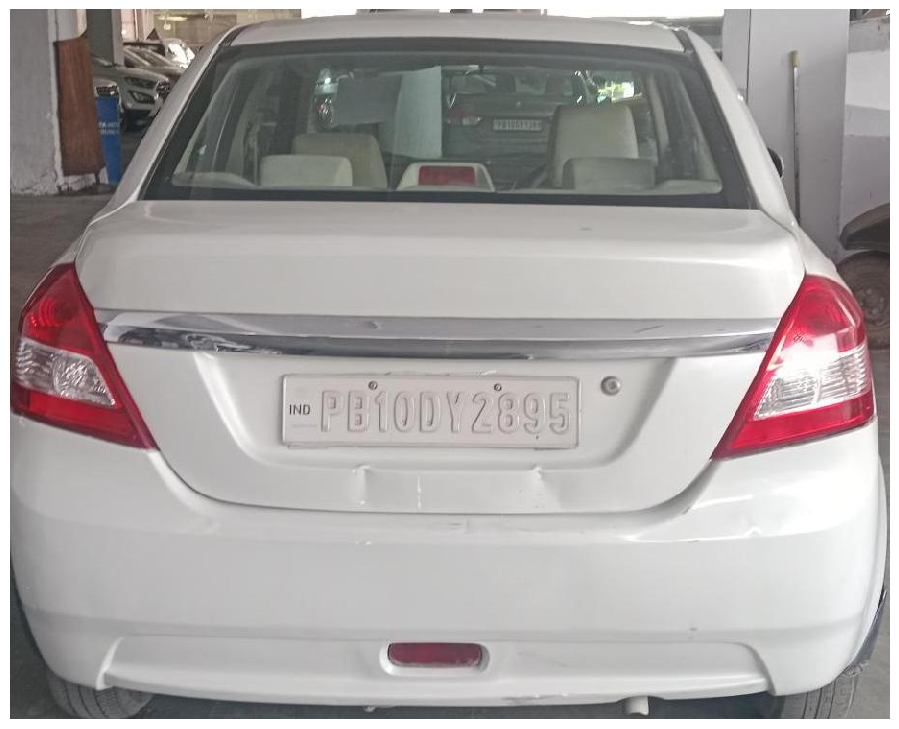

In [ ]:
test_image = '/content/4WCAN295818196_image2.jpeg'
best_model.predict(test_image).show()

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 7.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
from ultralytics import YOLO

In [ ]:
yolo_nas = models.get("yolo_nas_s", pretrained_weights = "/content/ckpt_best.pth")

ValueError: `pretrained_weights="/content/ckpt_best.pth"` is not a valid and was not found in that platform. Valid pretrained weights are: "dict_keys(['imagenet', 'imagenet21k', 'coco_segmentation_subclass', 'cityscapes', 'coco', 'coco_pose', 'cifar10'])"

In [ ]:
model = YOLO('/content/best.pt')

In [ ]:
result=model.predict('/content/4WCAN295818196_image2.jpeg')


image 1/1 /content/4WCAN295818196_image2.jpeg: 544x640 (no detections), 30.3ms
Speed: 3.9ms preprocess, 30.3ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/Q-Jz1slX2Hu Original Image 1.jpg')
results=model.predict('/content/Q-Jz1slX2Hu Original Image 1.jpg')


image 1/1 /content/Q-Jz1slX2Hu Original Image 1.jpg: 640x640 9 Brokens, 17.9ms
Speed: 2.3ms preprocess, 17.9ms inference, 71.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Broken', 1: 'Bird Dropping', 2: 'Dent', 3: 'Scratch', 4: 'Rust', 5: 'Dirt'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [

In [ ]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename='result8.jpg')  # save to disk

In [ ]:
model2 = YOLO('/content/best2.pt')

In [ ]:
result2=model2.predict('/content/4WCAN296068982_image2.jpeg')



image 1/1 /content/4WCAN296068982_image2.jpeg: 512x640 (no detections), 112.8ms
Speed: 4.0ms preprocess, 112.8ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


In [ ]:
for result in result2:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename='result13.jpg')  # save to disk

In [ ]:
/content/Q-Jz1slX2Hu Original Image 1.jpg

[2024-05-14 11:08:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


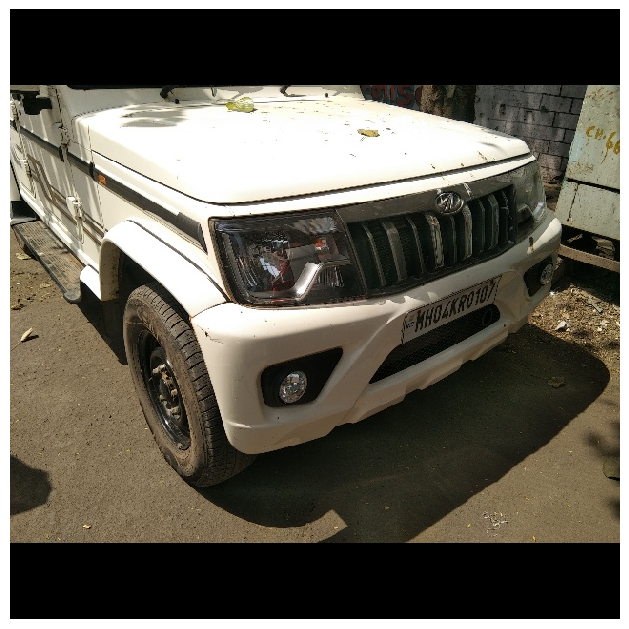

In [ ]:
test_image = '/content/Q-Jz1slX2Hu Original Image 17.jpg'
best_model.predict(test_image).show()

[2024-05-14 11:20:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


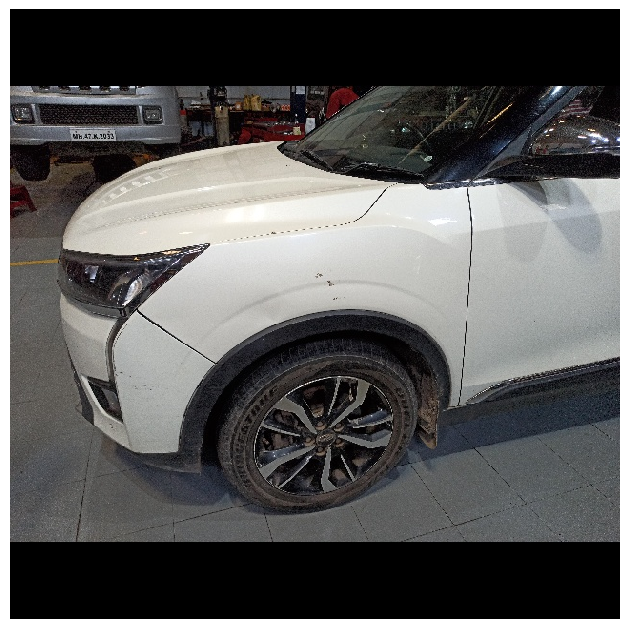

In [ ]:
test_image = '/content/Q-ztEa1gpZx Original Image 5.jpg'
best_model.predict(test_image).show()